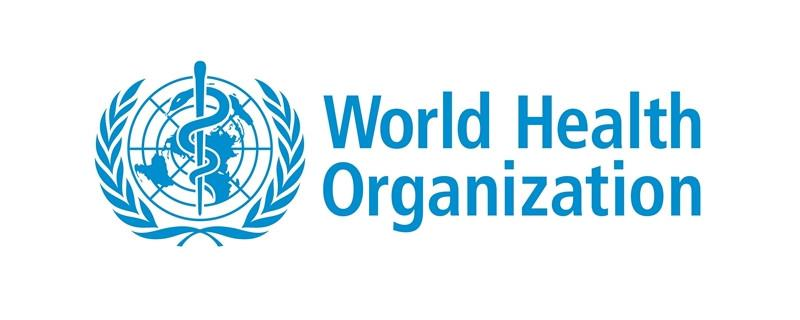

In [3]:
Image("I.jpg")

# Life Expectancy (WHO)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import dtale

from IPython.display import Image

In [2]:
df = pd.read_csv('life_expectancy_data.csv')
desc = pd.read_csv('data_description.csv')

In [3]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.rename(columns={'Country': 'country', 'Year': 'year', 'Status': 'status', 'Life expectancy ': 'life_expectancy', 'Adult Mortality':'adult_mortality', 'infant deaths':'infant_deaths', 'Alcohol':'alcohol', 'percentage expenditure':'percentage_expenditure', 'Hepatitis B':'hepatitis_b', 'Measles ':'measles', ' BMI ':'bmi', 'under-five deaths ':'under_five_deaths', 'Polio':'polio', 'Total expenditure':'total_expenditure', 'Diphtheria ':'diphtheria', ' HIV/AIDS':'hiv_aids', 'GDP':'gdp', 'Population':'population', ' thinness  1-19 years':'thinness_10-19', ' thinness 5-9 years':'thinness_5-9', 'Income composition of resources':'income_composition', 'Schooling':'schooling'}, inplace=True)
df.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_10-19,thinness_5-9,income_composition,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
desc

,Variable,Type,Definition
0,Country,Categorical,Country
1,Year,Categorical,Year
2,Status,Categorical,Status refers to whether a nation is Developin...
3,Life expectancy,Numerical,Life expectancy�is a statistical measure of th...
4,Adult Mortality,Numerical,Probability of dying between 15 and 60 years p...
5,infant deaths,Numerical,"The number of deaths per 1,000 live births of ..."
6,Alcohol,Numerical,Alcohol consumption per capita for people aged...
7,percentage expenditure,Numerical,Expenditure on health as a percentage of GDP p...
8,Hepatitis B,Numerical,HepB immunization coverage among 1-year olds(%)
9,Measles,Numerical,No of reported cases per 1000 population


## Data Exploration

##### Analyzing Life Expectancy

count    2928.000000
mean       69.224932
std         9.523867
min        36.300000
25%        63.100000
50%        72.100000
75%        75.700000
max        89.000000
Name: life_expectancy, dtype: float64


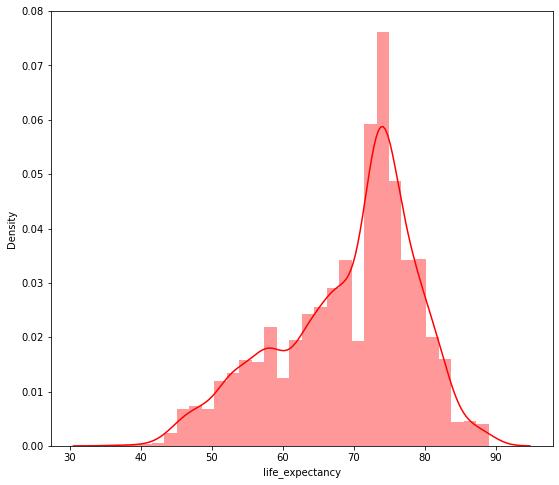

In [6]:
#descriptive statistics summary and histogram

print(df['life_expectancy'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['life_expectancy'], color='r');

#df['life_expectancy'].describe()

* Deviate from the normal distribution.<br>
* Have appreciable negative skewness.<br>
* Show peakedness.<br>

In [7]:
#skewness and kurtosis
print("Skewness: %f" % df['life_expectancy'].skew())
print("Kurtosis: %f" % df['life_expectancy'].kurt())

Skewness: -0.638605
Kurtosis: -0.234477


###### Inexplicit Nulls or Faulty Data:

##### [Dtale Library](https://www.youtube.com/watch?v=xSXGcuiEzUc)

In [8]:
dtale.show(df)

###### Ranges for every column for deciding Inexplicit Nulls:

* Adult Mortality: Min=35 ,Max=Remove Outliers
* [Infant Deaths](https://www.cia.gov/the-world-factbook/field/infant-mortality-rate/country-comparison): Min=1, Max=177
* [Hepatitis B](https://apps.who.int/gho/data/node.main.A828?lang=en): Min=10, Max=X
* BMI of 1 and 87.3 are highly unrealistic. A BMI of 15 or lower is seriously underweight and a BMI of 40 or higher is morbidly obese, therefore a large number of these measurements just seem unrealistic...this variable might not be worth digging into at all.
* [Measles](https://apps.who.int/gho/data/view.main.1540_62), Min=1
* [Polio](https://apps.who.int/gho/data/node.main.A831?lang=en): Remove Outliers
* Under 5 deaths
* Total Expenditure: Outliers are important.
* [Diptheria immunization](https://apps.who.int/gho/data/node.main.A827): Check outliers.
* [HIV/AIDS](https://en.wikipedia.org/wiki/List_of_countries_by_HIV/AIDS_adult_prevalence_rate): Outliers are important.
* GDP: Outliers are important.
* Thinness 10-19: Outliers are important.
* Thinness 5-9: Outliers are important.
* Income composition: Outlier = 0
* Schooling: Remove outliers

In [9]:
print("Total null values excluding inexplicit nulls")
col_na = df.columns[df.isnull().any()]
df_na_cnt = df[col_na].isnull().sum()
df_na = (df[col_na].isnull().sum()/len(df)) * 100
df_na = pd.DataFrame({'Total Null Val': df_na_cnt, 'Null Value %': df_na})
df_na = df_na.sort_values(by='Null Value %', ascending=False)
df_na

Total null values excluding inexplicit nulls


,Total Null Val,Null Value %
population,652,22.191967
hepatitis_b,553,18.822328
gdp,448,15.248468
total_expenditure,226,7.692308
alcohol,194,6.603131
income_composition,167,5.684139
schooling,163,5.547992
bmi,34,1.157250
thinness_10-19,34,1.157250
thinness_5-9,34,1.157250


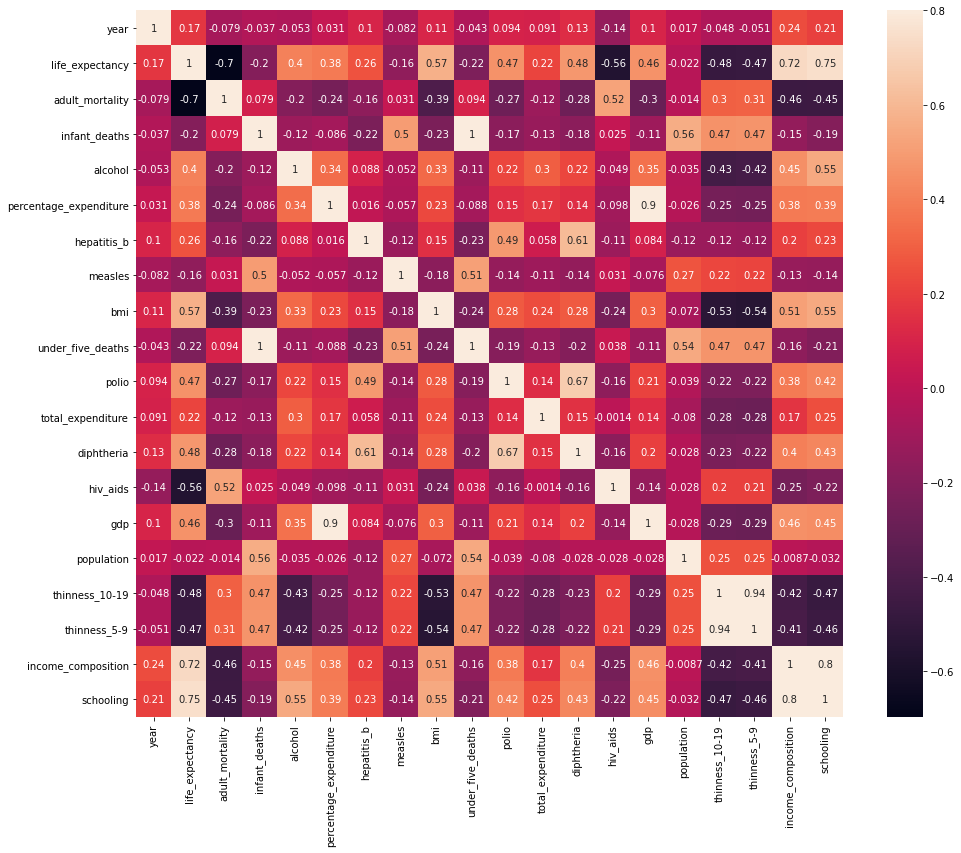

In [10]:
##### Correlation matrix (heatmap style)

corrmat = df.corr()
f, ax = plt.subplots(figsize=(16, 13))
sns.heatmap(corrmat, annot=True, vmax=.8, square=True);

##### Converting all faulty values to nulls. 

In [11]:
df.adult_mortality = df.apply(lambda x: np.nan if x.adult_mortality < 35 or x.adult_mortality > 459  else x.adult_mortality, axis=1)
df.infant_deaths = df.apply(lambda x: np.nan if x.infant_deaths < 1 or x.infant_deaths > 177  else x.infant_deaths, axis=1)
df.hepatitis_b = df.apply(lambda x: np.nan if x.hepatitis_b < 15 else x.hepatitis_b, axis=1)
df.measles = df.apply(lambda x: np.nan if x.measles < 1 else x.measles, axis=1)
df.bmi = df.apply(lambda x: np.nan if x.bmi < 15 or x.bmi > 40  else x.bmi, axis=1)
df.polio = df.apply(lambda x: np.nan if x.polio < 23  else x.polio, axis=1)
df.diphtheria = df.apply(lambda x: np.nan if x.diphtheria < 16 else x.diphtheria, axis=1)
df.income_composition = df.apply(lambda x: np.nan if x.income_composition == 0 else x.income_composition, axis=1)
df.schooling = df.apply(lambda x: np.nan if x.schooling < 2.8 else x.schooling, axis=1)

Drop Percentage Expenditure (Reason:)<br>
Drop Population (Reason:)<br> 
Drop bmi (Reason:)<br> 



In [12]:
df.drop('percentage_expenditure', inplace= True, axis=1)
df.drop('population', inplace= True, axis=1)
print(f'After dropping features, shape of data: {df.shape}')

After dropping features, shape of data: (2938, 20)


In [13]:
col_na = df.columns[df.isnull().any()]
df_na_cnt = df[col_na].isnull().sum()
df_na = (df[col_na].isnull().sum()/len(df)) * 100
df_na = pd.DataFrame({'Total Null Val': df_na_cnt, 'Null Value %': df_na})
df_na = df_na.sort_values(by='Null Value %', ascending=False)
df_na

,Total Null Val,Null Value %
bmi,1976,67.256637
measles,983,33.458135
infant_deaths,941,32.028591
hepatitis_b,721,24.540504
adult_mortality,528,17.971409
gdp,448,15.248468
income_composition,297,10.108918
total_expenditure,226,7.692308
alcohol,194,6.603131
polio,192,6.535058


In [14]:
df.drop('bmi', inplace= True, axis=1) #67% misssing
df.drop('measles', inplace= True, axis=1) #corr = -0.15, 33.5% misssing

<AxesSubplot:>

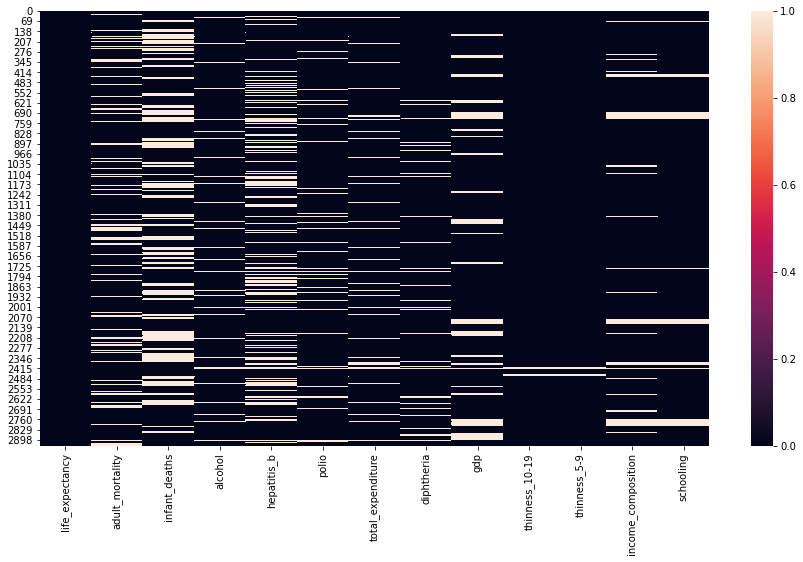

In [15]:
# Visualize missing values using heatmap. If there is any pattern in the missing data.
# White lines represent missing values

plt.figure(figsize=(15, 8))
sns.heatmap(df[df.columns[df.isnull().any()]].isnull())

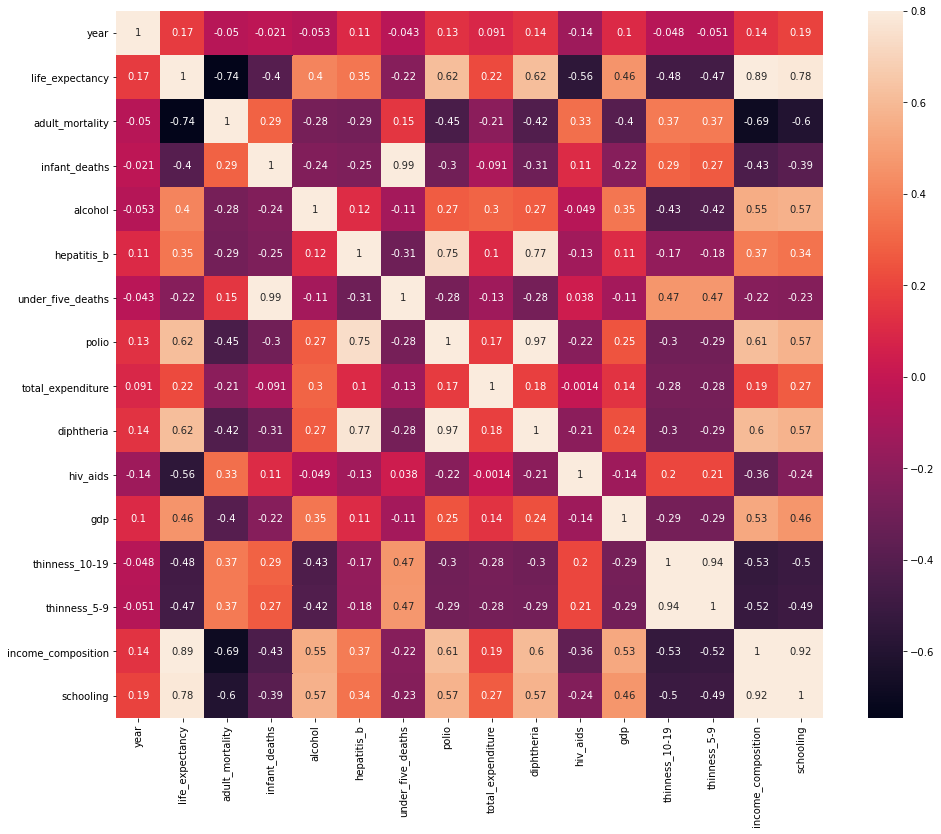

In [16]:
##### Correlation matrix after dropping faltu variables

corrmat = df.corr()
f, ax = plt.subplots(figsize=(16, 13))
sns.heatmap(corrmat, annot=True, vmax=.8, square=True);

##### Numerical data distribution

In [17]:
print(list(set(df.dtypes.tolist())))

[dtype('float64'), dtype('int64'), dtype('O')]


In [18]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,hepatitis_b,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,thinness_10-19,thinness_5-9,income_composition,schooling
0,2015,65.0,263.0,62.0,0.01,65.0,83,NaN,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64.0,0.01,62.0,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66.0,0.01,64.0,89,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69.0,0.01,67.0,93,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71.0,0.01,68.0,97,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5


Now lets plot them all:


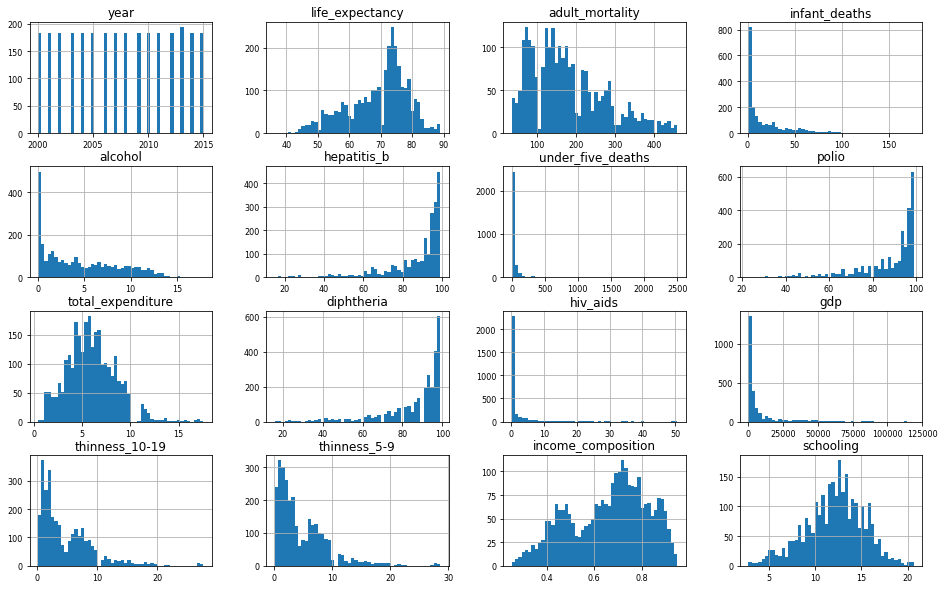

In [19]:
print("Now lets plot them all:")
df_num.hist(figsize=(16, 10), bins=50, xlabelsize=8, ylabelsize=8);

##### Life Expectancy relationship with categorical features

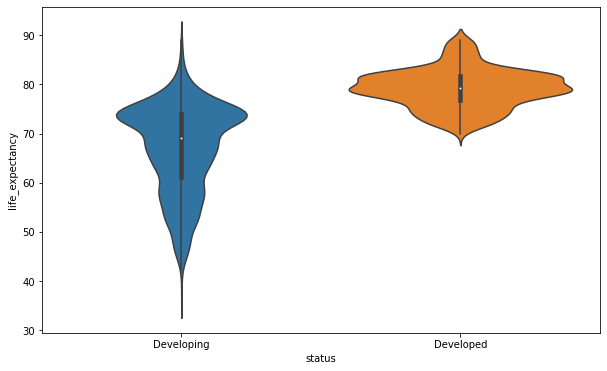

In [20]:
#box plot Status/Life Expectancy
var = 'status'
data = pd.concat([df['life_expectancy'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.violinplot(x=var, y="life_expectancy", data=data)
#fig.axis(ymin=0, ymax=800000);

Life Expectancy is higher in developed countries

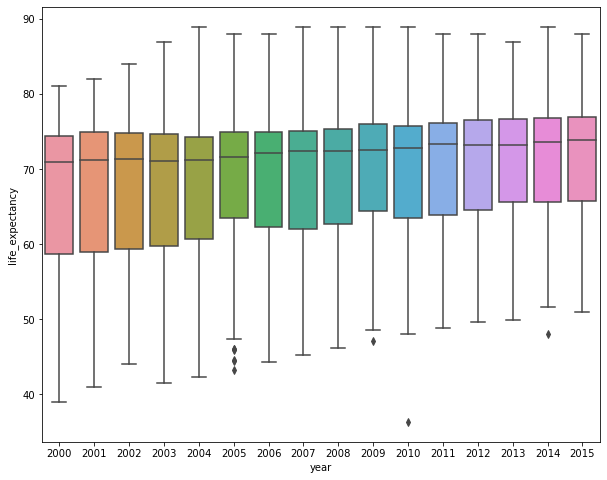

In [21]:
#box plot Year/Life Expectancy
var = 'year'
data = pd.concat([df['life_expectancy'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x=var, y="life_expectancy", data=data)
#fig.axis(ymin=0, ymax=800000);

Life Expectancy shayad har saal thodi badh rahi hai

[How to Perform an F-Test in Python](https://www.statology.org/f-test-python/)
<br>Page 74 (fig 2.3, f value and significance level)


##### Scatter plots between 'Life Expectancy' and Correlated Variables 

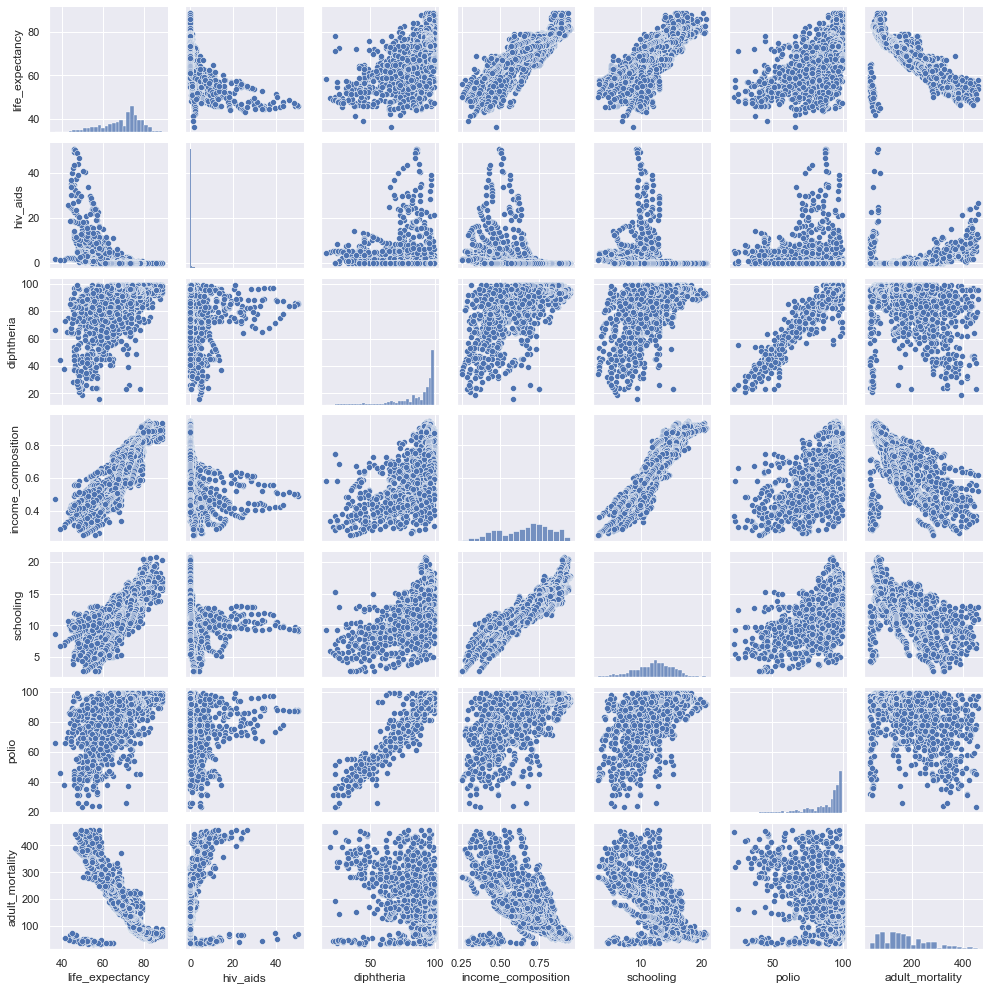

In [22]:
#scatterplot
sns.set()
cols = ['life_expectancy', 'hiv_aids', 'diphtheria', 'income_composition', 'schooling', 'polio', 'adult_mortality']
sns.pairplot(df[cols], size = 2)
plt.show();

Ohhh bhai!!! Baad me dimaag lagate hain

##### Missing data
[Dealing with Missing Data](https://medium.com/@danberdov/dealing-with-missing-data-8b71cd819501)<br>
[Simple techniques for missing data imputation](https://www.kaggle.com/residentmario/simple-techniques-for-missing-data-imputation)

##### Note:
The most common prediction algorithms for imputation are Linear Regression and K-Nearest Neighbors. Using the target variable as a predictor is not a good choice since we are leaking data for future models.

In [20]:
dtale.show(df)

##### Filling missing values:
* infant_deaths: KNN	
* hepatitis_b: Mode	
* adult_mortality: Regression, KNN (best)	
* gdp: KNN
* income_composition: Regression	
* total_expenditure: Regression	
* alcohol:	KNN
* polio: Median	
* schooling: Regression	
* diphtheria: Median	
* thinness_1-19: KNN 	
* thinness_5-9	KNN

In [21]:
df.groupby('status').mean() #aur median

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,hepatitis_b,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,thinness_1-19,thinness_5-9,income_composition,schooling
status,,,,,,,,,,,,,,,,
Developed,2007.500000,79.197852,94.123223,4.005236,9.826736,92.291925,1.810547,94.910891,7.554042,95.159363,0.100000,22053.386446,1.320703,1.296680,0.852489,15.845474
Developing,2007.522671,67.111465,196.230885,22.494463,3.484119,85.485488,50.525144,85.550647,5.590694,85.119715,2.088664,4286.556053,5.592935,5.635242,0.617083,11.356855


In [22]:
df.groupby('status').median()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,hepatitis_b,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,thinness_1-19,thinness_5-9,income_composition,schooling
status,,,,,,,,,,,,,,,,
Developed,2007.5,79.25,78.0,2.0,10.32,95.0,0.0,96.0,7.895,96.0,0.1,13560.723860,1.1,1.0,0.862,15.8
Developing,2008.0,69.00,176.5,10.0,2.56,92.0,7.0,92.0,5.400,92.0,0.1,1246.021671,4.5,4.6,0.644,11.7


##### Out liars!

Outliers is also something that we should be aware of. Why? Because outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

Outliers is a complex subject and it deserves more attention. Here, we'll just do a quick analysis through the standard deviation of 'SalePrice' and a set of scatter plots.

[Ways to Detect and Remove the Outliers](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba)

###### Univariate analysis
The primary concern here is to establish a threshold that defines an observation as an outlier. To do so, we'll standardize the data. In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1